### lotss of people get confused when they try to apply the knn today we will use it and see we will se it how it works

##### main goal of ours is to learn a function h:X → Y where X denotes the feature and y which we are going to predict

KNN is totally non parametric and instance based

 minimal training phase of KNN comes both at a memory cost, since we must store a potentially huge data set, as well as a computational cost during test time since classifying a given observation requires a run down of the whole data set. Practically speaking, this is undesirable since we usually want fast responses.

KNN working 

firstly it will apply the euclidean distance to get similarity
More formally, given a positive integer K, an unseen observation x and a similarity metric d

, KNN classifier performs the following two steps:

    It runs through the whole dataset computing d

between x and each training observation. We’ll call the K points in the training data that are closest to x the set A

. Note that K is usually odd to prevent tie situations.

It then estimates the conditional probability for each class, that is, the fraction of points in A
with that given class label. (Note I(x) is the indicator function which evaluates to 1 when the argument x is true and 0 otherwise)

Finally, our input x gets assigned to the class with the largest probability.

Now lets come to the main step how to pick the value of k. if you will pick very small value of k then it will be low bias high variance and large value of k means high bias low variance

we will use iris flower data set Our goal is to train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.

In [2]:
import pandas as pd
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df=pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',sep=',',names=names,header=None)

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# loading libraries
import numpy as np
from sklearn.model_selection import train_test_split

# create design matrix X and target vector y
X = np.array(df.iloc[:, 0:4]) 	# end index is exclusive
y = np.array(df['class']) 	# another way of indexing a pandas df

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [5]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test,pred))



0.98


But how the 'k' value is selected? curious to know? so what we are doing is using the test set as a training set! This means that we are underestimating the true error rate since our model has been forced to fit the test set in the best possible manner. Our model is then incapable of generalizing to newer observations, a process known as overfitting

In [26]:
from sklearn.model_selection import cross_val_score
myList = list(range(1,50))

# subsetting just the odd ones
neighbors =list(filter(lambda x: x % 2 != 0, myList)) 

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 7


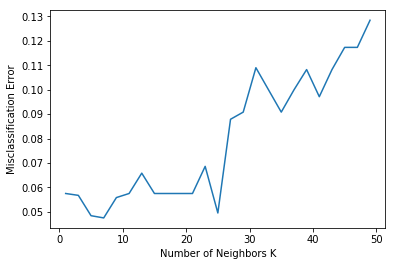

In [33]:
import matplotlib.pyplot as plt
MSE = [1 - x for x in cv_scores]

# determining best k

thadari=neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % thadari) 
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()
